In [2]:
import matplotlib.pyplot as m
'''
QUESTION 1
'''
import pandas as pd
# importing the datasets
df1 = pd.read_csv('Olympics_dataset1.csv')
df2 = pd.read_csv('Olympics_dataset2.csv')

# merging the datasets
df = pd.merge(left=df1, right=df2, on=None, left_on='Team', right_on='Team')

# dropping the first row of the datasets
df.drop(df.index[0], inplace=True)

# dropping the unsued columns
df.drop(['Combined Total', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',], axis='columns', inplace=True)

# creating a dict to map the renaming of columns
rename_dict = {
    "Team": "Country",
    "Unnamed: 1": "summer_rubbish",
    "Summer Games": "summer_participation",
    "Unnamed: 3_x": "summer_gold",
    "Unnamed: 4_x": "summer_silver",
    "Unnamed: 5_x": "summer_bronze",
    "Unnamed: 6": "summer_total",
    "Winter Games": "winter_participation",
    "Unnamed: 2": "winter_gold",
    "Unnamed: 3_y": "winter_silver",
    "Unnamed: 4_y": "winter_bronze",
    "Unnamed: 5_y": "winter_total",
}

# renaming the columns
df.rename(columns=rename_dict, inplace=True)

# removing the 'Totals' row from the dataframe
df = df[df.Country != 'Totals']
#df.drop(df.index[df.shape[0]-1], inplace=True)

# printing first five rows of dataframe
print(df.head().to_string())

'''
QUESTION 2
'''

# function for removing the words in brackets
def remove_words_in_brackets(cell):
    for i in range(len(cell)):
        if cell[i] == '(':
            return cell[:i]
    return cell

# removing words in brackets
df['Country'] = df['Country'].map(remove_words_in_brackets)

# setting index as Country
df.set_index('Country', inplace=True)

# removing the undesired columns
df.drop(['summer_rubbish', 'summer_total', 'winter_total'], axis='columns', inplace=True)

# printing the data
df.head().to_string()

'''
QUESTION 3
'''

# dropping rows with na values
df.dropna(how='all', inplace=True)

# printing values
df.tail(10).to_string()


'''
QUESTION 4
'''

# function for casting string to integer
def convert_int(n):
    if ',' in n:
        n = n.replace(',', '')
        return int(n)
    else:
        return int(n)

# converting string into numbers
df['summer_gold'] = df['summer_gold'].map(convert_int)

# printing the country with max gold
df[df['summer_gold'] == df['summer_gold'].max()].index[0]

# converting string into numbers
df['winter_gold'] = df['winter_gold'].map(convert_int)

# finding the max difference
max_diff = abs(df['winter_gold'] - df['summer_gold']).max()

# finding the name of the country
print(df[abs(df['winter_gold'] - df['summer_gold']) == max_diff].index[0], max_diff)
'''
QUESTION 6
'''
# changing the str values to numberic values
df['summer_silver'] = df['summer_silver'].map(convert_int)
df['summer_bronze'] = df['summer_bronze'].map(convert_int)
df['winter_silver'] = df['winter_silver'].map(convert_int)
df['winter_bronze'] = df['winter_bronze'].map(convert_int)

# creating a new column with sum of all medals
df['total'] = df['summer_gold'] + df['summer_silver'] + df['summer_bronze'] + df['winter_gold'] + df['winter_silver'] + df['winter_bronze']

# printing the values
print(df.sort_values(by='total', ascending=False).head().to_string())
print(df.sort_values(by='total', ascending=False).tail().to_string())

# convert participation from string to int
df['summer_participation'] = df['summer_participation'].map(convert_int)

# make a new column in dataframe with the rule
df['rate_summer'] = (df['summer_gold']*5 + df['summer_silver']*3 + df['summer_bronze'])/df['summer_participation']

# changing the NaN from  the above transformation to 0
df.loc[df['summer_participation'] == 0, 'rate_summer'] = 0


                    Country summer_rubbish summer_participation summer_gold summer_silver summer_bronze summer_total winter_participation winter_gold winter_silver winter_bronze winter_total
1         Afghanistan (AFG)            BLA                   14           0             0             2            2                    0           0             0             0            0
2             Algeria (ALG)            BLA                   13           5             4             8           17                    3           0             0             0            0
3           Argentina (ARG)            BLA                   24          21            25            28           74                   19           0             0             0            0
4             Armenia (ARM)            BLA                    6           2             6             6           14                    7           0             0             0            0
5   Australasia (ANZ) [ANZ]            BLA   

In [3]:
# convert participation from string to int
df['winter_participation'] = df['winter_participation'].map(convert_int)


In [4]:
# make a new column in dataframe with the rule
df['rate_winter'] = (df['winter_gold']*5 + df['winter_silver']*3 + df['winter_bronze'])/df['winter_participation']

# changing the NaN from  the above transformation to 0
df.loc[df['winter_participation'] == 0, 'rate_winter'] = 0


In [5]:
continents_df = pd.read_csv('Countries-Continents.csv')

In [6]:
# merging the datasets
df_joined = pd.merge(left=df, right=continents_df, on=None, left_on=df.index.str.strip(), right_on='Country', how='left')
list_of_colors = ['green','orange','brown','dodgerblue','red', 'yellow']

In [7]:
df_joined["Continent"].fillna("Unknown", inplace = True) 


In [17]:
africa_df = df_joined.query('Continent == "Africa"').filter(['rate_summer', 'rate_winter', 'Country']).set_index('Country')
asia_df = df_joined.query('Continent == "Asia"').filter(['rate_summer', 'rate_winter', 'Country']).set_index('Country')
europe_df = df_joined.query('Continent == "Europe"').filter(['rate_summer', 'rate_winter', 'Country']).set_index('Country')
n_america_df = df_joined.query('Continent == "North America"').filter(['rate_summer', 'rate_winter', 'Country']).set_index('Country')
s_america_df = df_joined.query('Continent == "South America"').filter(['rate_summer', 'rate_winter', 'Country']).set_index('Country')
oceania_df = df_joined.query('Continent == "Oceania"').filter(['rate_summer', 'rate_winter', 'Country']).set_index('Country')
unknown_df = df_joined.query('Continent == "Unknown"').filter(['rate_summer', 'rate_winter', 'Country']).set_index('Country')


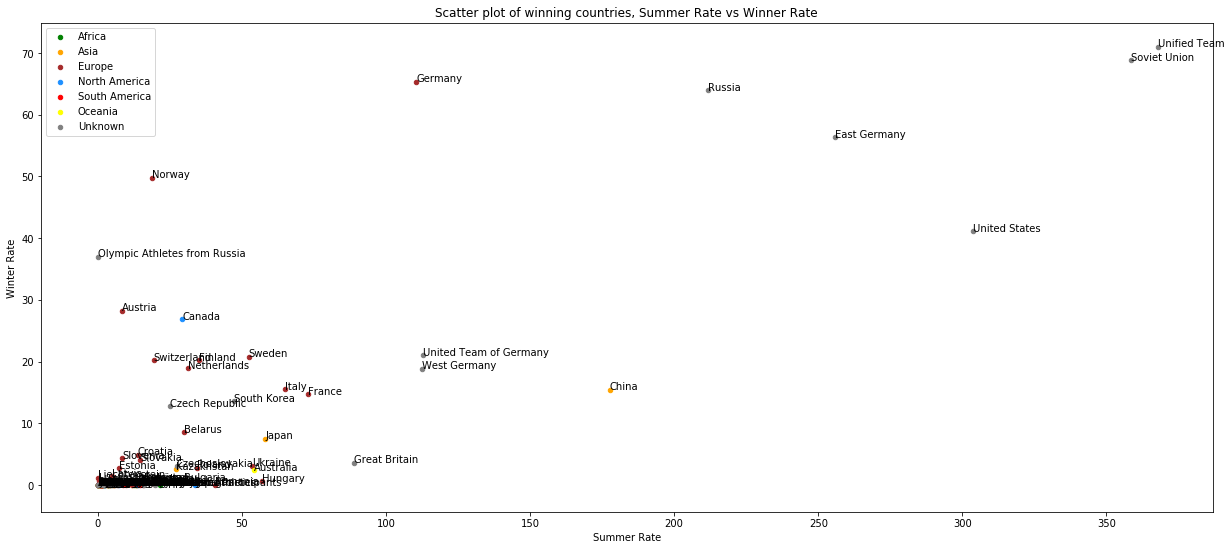

In [25]:
def annotate_df(df, ax):
    for k, v in df.iterrows():
        ax.annotate(k, v)

ax = africa_df.plot.scatter(x='rate_summer', y='rate_winter', color='green', label='Africa')
ax = asia_df.plot.scatter(x='rate_summer', y='rate_winter', color='orange', label='Asia', ax=ax)
ax = europe_df.plot.scatter(x='rate_summer', y='rate_winter', color='brown', label='Europe', ax=ax)
ax = n_america_df.plot.scatter(x='rate_summer', y='rate_winter', color='dodgerblue', label='North America', ax=ax)
ax = s_america_df.plot.scatter(x='rate_summer', y='rate_winter', color='red', label='South America', ax=ax)
ax = oceania_df.plot.scatter(x='rate_summer', y='rate_winter', color='yellow', label='Oceania', ax=ax)
ax = unknown_df.plot.scatter(x='rate_summer', y='rate_winter', color='grey', label='Unknown', figsize=(21,9), ax=ax, title='Scatter plot of winning countries, Summer Rate vs Winner Rate')
ax.set_xlabel("Summer Rate")
ax.set_ylabel("Winter Rate")

annotate_df(africa_df, ax)
annotate_df(asia_df, ax)
annotate_df(europe_df, ax)
annotate_df(n_america_df, ax)
annotate_df(s_america_df, ax)
annotate_df(oceania_df, ax)
annotate_df(unknown_df, ax)

m.show()

In [10]:
for i, country in enumerate(asia_df['Country']):
    ax.text(asia_df.loc[asia_df['Country'] == country]['rate_summer'].item()+0.3, asia_df.loc[asia_df['Country'] == country]['rate_summer'].item()+0.3, country, fontsize=9)
m.show()

In [16]:
x = africa_df.filter(['rate_summer', 'rate_winter', 'Country']).set_index('Country')
x

,rate_summer,rate_winter
Country,,
Algeria,3.461538,0.0
Botswana,0.300000,0.0
Burundi,1.333333,0.0
Cameroon,1.428571,0.0
Ivory Coast,0.692308,0.0
Djibouti,0.125000,0.0
Egypt,3.636364,0.0
Eritrea,0.200000,0.0
Ethiopia,12.538462,0.0
